## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  38.873554   974.430553  0.332926  10.869907  1.519992
1  77.182483  1239.296992  0.603458   4.854161  1.577485
2  31.276930   220.702194  0.483854   4.568801  1.349745
3  61.937471   564.779348  0.001847   7.906703 -0.113646
4  20.444590   619.755879  0.537635   1.714154  1.410703


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.36896 | train_mse: 3.8683  | train_mae: 1.23397 |  0:00:00s
epoch 1  | loss: 1.32854 | train_mse: 2.72779 | train_mae: 1.16808 |  0:00:00s
epoch 2  | loss: 0.62476 | train_mse: 2.04662 | train_mae: 1.01153 |  0:00:00s


epoch 3  | loss: 0.6004  | train_mse: 1.86867 | train_mae: 0.91764 |  0:00:00s
epoch 4  | loss: 0.56803 | train_mse: 1.18073 | train_mae: 0.69783 |  0:00:00s


epoch 5  | loss: 0.49831 | train_mse: 0.76601 | train_mae: 0.57981 |  0:00:00s
epoch 6  | loss: 0.41122 | train_mse: 0.71097 | train_mae: 0.57598 |  0:00:01s
epoch 7  | loss: 0.41138 | train_mse: 0.75237 | train_mae: 0.64848 |  0:00:01s


epoch 8  | loss: 0.40716 | train_mse: 0.63909 | train_mae: 0.59065 |  0:00:01s
epoch 9  | loss: 0.4061  | train_mse: 0.48479 | train_mae: 0.49628 |  0:00:01s


epoch 10 | loss: 0.34674 | train_mse: 0.36058 | train_mae: 0.42739 |  0:00:01s
epoch 11 | loss: 0.37502 | train_mse: 0.32785 | train_mae: 0.40005 |  0:00:01s
epoch 12 | loss: 0.26491 | train_mse: 0.29002 | train_mae: 0.40792 |  0:00:01s


epoch 13 | loss: 0.33286 | train_mse: 0.35255 | train_mae: 0.41898 |  0:00:01s
epoch 14 | loss: 0.34117 | train_mse: 0.51509 | train_mae: 0.45328 |  0:00:01s
epoch 15 | loss: 0.28424 | train_mse: 0.50696 | train_mae: 0.45514 |  0:00:01s


epoch 16 | loss: 0.15681 | train_mse: 0.40887 | train_mae: 0.45982 |  0:00:01s
epoch 17 | loss: 0.32577 | train_mse: 0.29898 | train_mae: 0.42281 |  0:00:02s
epoch 18 | loss: 0.20431 | train_mse: 0.25188 | train_mae: 0.3925  |  0:00:02s


epoch 19 | loss: 0.20839 | train_mse: 0.19992 | train_mae: 0.35129 |  0:00:02s
epoch 20 | loss: 0.20952 | train_mse: 0.20768 | train_mae: 0.35922 |  0:00:02s
epoch 21 | loss: 0.17086 | train_mse: 0.23387 | train_mae: 0.37127 |  0:00:02s


epoch 22 | loss: 0.17791 | train_mse: 0.22277 | train_mae: 0.37332 |  0:00:02s
epoch 23 | loss: 0.13483 | train_mse: 0.19862 | train_mae: 0.34954 |  0:00:02s
epoch 24 | loss: 0.56759 | train_mse: 0.1618  | train_mae: 0.32268 |  0:00:02s


epoch 25 | loss: 0.23388 | train_mse: 0.16081 | train_mae: 0.31934 |  0:00:02s
epoch 26 | loss: 0.19777 | train_mse: 0.16823 | train_mae: 0.31609 |  0:00:02s
epoch 27 | loss: 0.27024 | train_mse: 0.2127  | train_mae: 0.32951 |  0:00:02s


epoch 28 | loss: 0.16926 | train_mse: 0.18824 | train_mae: 0.31683 |  0:00:03s
epoch 29 | loss: 0.16558 | train_mse: 0.15169 | train_mae: 0.29276 |  0:00:03s
epoch 30 | loss: 0.31053 | train_mse: 0.18004 | train_mae: 0.30237 |  0:00:03s


epoch 31 | loss: 0.23072 | train_mse: 0.2975  | train_mae: 0.36103 |  0:00:03s
epoch 32 | loss: 0.18945 | train_mse: 0.27971 | train_mae: 0.35591 |  0:00:03s
epoch 33 | loss: 0.16685 | train_mse: 0.25751 | train_mae: 0.34874 |  0:00:03s


epoch 34 | loss: 0.18869 | train_mse: 0.18429 | train_mae: 0.32048 |  0:00:03s
epoch 35 | loss: 0.21872 | train_mse: 0.19104 | train_mae: 0.30785 |  0:00:03s
epoch 36 | loss: 0.2129  | train_mse: 0.20042 | train_mae: 0.30808 |  0:00:03s


epoch 37 | loss: 0.12438 | train_mse: 0.23007 | train_mae: 0.3127  |  0:00:03s
epoch 38 | loss: 0.24838 | train_mse: 0.21057 | train_mae: 0.30853 |  0:00:03s
epoch 39 | loss: 0.12634 | train_mse: 0.21081 | train_mae: 0.31909 |  0:00:03s


epoch 40 | loss: 0.27532 | train_mse: 0.26904 | train_mae: 0.34557 |  0:00:04s
epoch 41 | loss: 0.12019 | train_mse: 0.19286 | train_mae: 0.29948 |  0:00:04s


epoch 42 | loss: 0.16716 | train_mse: 0.11582 | train_mae: 0.25175 |  0:00:04s
epoch 43 | loss: 0.22275 | train_mse: 0.1062  | train_mae: 0.24333 |  0:00:04s
epoch 44 | loss: 0.15197 | train_mse: 0.08899 | train_mae: 0.23246 |  0:00:04s


epoch 45 | loss: 0.08548 | train_mse: 0.13082 | train_mae: 0.27046 |  0:00:04s
epoch 46 | loss: 0.17234 | train_mse: 0.14492 | train_mae: 0.28129 |  0:00:04s
epoch 47 | loss: 0.1047  | train_mse: 0.16873 | train_mae: 0.29374 |  0:00:04s


epoch 48 | loss: 0.23619 | train_mse: 0.16338 | train_mae: 0.28922 |  0:00:04s
epoch 49 | loss: 0.1894  | train_mse: 0.16015 | train_mae: 0.28928 |  0:00:04s
epoch 50 | loss: 0.26096 | train_mse: 0.13878 | train_mae: 0.27671 |  0:00:04s


epoch 51 | loss: 0.1143  | train_mse: 0.10196 | train_mae: 0.24868 |  0:00:05s
epoch 52 | loss: 0.35142 | train_mse: 0.15902 | train_mae: 0.28242 |  0:00:05s
epoch 53 | loss: 0.13049 | train_mse: 0.22618 | train_mae: 0.32073 |  0:00:05s


epoch 54 | loss: 0.16092 | train_mse: 0.16718 | train_mae: 0.29134 |  0:00:05s
epoch 55 | loss: 0.16411 | train_mse: 0.10251 | train_mae: 0.24668 |  0:00:05s
epoch 56 | loss: 0.0964  | train_mse: 0.07944 | train_mae: 0.23204 |  0:00:05s


epoch 57 | loss: 0.30905 | train_mse: 0.08662 | train_mae: 0.24118 |  0:00:05s
epoch 58 | loss: 0.08905 | train_mse: 0.1008  | train_mae: 0.24611 |  0:00:05s
epoch 59 | loss: 0.1631  | train_mse: 0.13167 | train_mae: 0.26955 |  0:00:05s


epoch 60 | loss: 0.31739 | train_mse: 0.14296 | train_mae: 0.27804 |  0:00:05s
epoch 61 | loss: 0.18892 | train_mse: 0.10241 | train_mae: 0.26261 |  0:00:05s
epoch 62 | loss: 0.09083 | train_mse: 0.10074 | train_mae: 0.25459 |  0:00:06s


epoch 63 | loss: 0.16795 | train_mse: 0.11117 | train_mae: 0.25238 |  0:00:06s
epoch 64 | loss: 0.14947 | train_mse: 0.07682 | train_mae: 0.21454 |  0:00:06s


epoch 65 | loss: 0.0911  | train_mse: 0.06345 | train_mae: 0.19591 |  0:00:06s
epoch 66 | loss: 0.10842 | train_mse: 0.05668 | train_mae: 0.19582 |  0:00:06s
epoch 67 | loss: 0.09012 | train_mse: 0.05838 | train_mae: 0.20123 |  0:00:06s


epoch 68 | loss: 0.23023 | train_mse: 0.08978 | train_mae: 0.22433 |  0:00:06s
epoch 69 | loss: 0.14133 | train_mse: 0.06047 | train_mae: 0.20158 |  0:00:06s
epoch 70 | loss: 0.10569 | train_mse: 0.06596 | train_mae: 0.21006 |  0:00:06s


epoch 71 | loss: 0.1496  | train_mse: 0.0887  | train_mae: 0.23226 |  0:00:06s
epoch 72 | loss: 0.22925 | train_mse: 0.07879 | train_mae: 0.22237 |  0:00:06s
epoch 73 | loss: 0.47514 | train_mse: 0.07591 | train_mae: 0.21721 |  0:00:07s


epoch 74 | loss: 0.15878 | train_mse: 0.08219 | train_mae: 0.21575 |  0:00:07s
epoch 75 | loss: 0.15913 | train_mse: 0.0783  | train_mae: 0.22602 |  0:00:07s
epoch 76 | loss: 0.14603 | train_mse: 0.0654  | train_mae: 0.20747 |  0:00:07s


epoch 77 | loss: 0.10394 | train_mse: 0.10157 | train_mae: 0.23778 |  0:00:07s
epoch 78 | loss: 0.24463 | train_mse: 0.11542 | train_mae: 0.2429  |  0:00:07s
epoch 79 | loss: 0.11116 | train_mse: 0.11177 | train_mae: 0.23494 |  0:00:07s


epoch 80 | loss: 0.21593 | train_mse: 0.06073 | train_mae: 0.18686 |  0:00:07s
epoch 81 | loss: 0.18492 | train_mse: 0.05948 | train_mae: 0.19295 |  0:00:07s
epoch 82 | loss: 0.19363 | train_mse: 0.06265 | train_mae: 0.19517 |  0:00:07s


epoch 83 | loss: 0.25026 | train_mse: 0.06147 | train_mae: 0.19284 |  0:00:07s
epoch 84 | loss: 0.14762 | train_mse: 0.0612  | train_mae: 0.18895 |  0:00:07s
epoch 85 | loss: 0.10949 | train_mse: 0.06088 | train_mae: 0.19716 |  0:00:08s


epoch 86 | loss: 0.12001 | train_mse: 0.05448 | train_mae: 0.19068 |  0:00:08s
epoch 87 | loss: 0.10774 | train_mse: 0.06221 | train_mae: 0.19697 |  0:00:08s
epoch 88 | loss: 0.15811 | train_mse: 0.07752 | train_mae: 0.20723 |  0:00:08s


epoch 89 | loss: 0.11907 | train_mse: 0.07565 | train_mae: 0.19928 |  0:00:08s
epoch 90 | loss: 0.06253 | train_mse: 0.1004  | train_mae: 0.22528 |  0:00:08s
epoch 91 | loss: 0.21316 | train_mse: 0.1504  | train_mae: 0.26195 |  0:00:08s


epoch 92 | loss: 0.11378 | train_mse: 0.10367 | train_mae: 0.23332 |  0:00:08s
epoch 93 | loss: 0.17866 | train_mse: 0.07014 | train_mae: 0.20713 |  0:00:08s
epoch 94 | loss: 0.0624  | train_mse: 0.05033 | train_mae: 0.18231 |  0:00:08s


epoch 95 | loss: 0.08357 | train_mse: 0.04819 | train_mae: 0.17757 |  0:00:08s
epoch 96 | loss: 0.09426 | train_mse: 0.0495  | train_mae: 0.18278 |  0:00:09s
epoch 97 | loss: 0.19323 | train_mse: 0.05709 | train_mae: 0.18854 |  0:00:09s


epoch 98 | loss: 0.14125 | train_mse: 0.07078 | train_mae: 0.2003  |  0:00:09s
epoch 99 | loss: 0.11519 | train_mse: 0.10577 | train_mae: 0.22994 |  0:00:09s


epoch 100| loss: 0.16567 | train_mse: 0.18212 | train_mae: 0.278   |  0:00:09s
epoch 101| loss: 0.20517 | train_mse: 0.21023 | train_mae: 0.29869 |  0:00:09s
epoch 102| loss: 0.1036  | train_mse: 0.11304 | train_mae: 0.24074 |  0:00:09s


epoch 103| loss: 0.28829 | train_mse: 0.06358 | train_mae: 0.20038 |  0:00:09s
epoch 104| loss: 0.18726 | train_mse: 0.05654 | train_mae: 0.19292 |  0:00:09s
epoch 105| loss: 0.31413 | train_mse: 0.05383 | train_mae: 0.18569 |  0:00:09s


epoch 106| loss: 0.21305 | train_mse: 0.08326 | train_mae: 0.21867 |  0:00:10s
epoch 107| loss: 0.09271 | train_mse: 0.08924 | train_mae: 0.21953 |  0:00:10s
epoch 108| loss: 0.09294 | train_mse: 0.06535 | train_mae: 0.20125 |  0:00:10s


epoch 109| loss: 0.08477 | train_mse: 0.05471 | train_mae: 0.18763 |  0:00:10s
epoch 110| loss: 0.13069 | train_mse: 0.06784 | train_mae: 0.20801 |  0:00:10s
epoch 111| loss: 0.11179 | train_mse: 0.09761 | train_mae: 0.23437 |  0:00:10s


epoch 112| loss: 0.22008 | train_mse: 0.12949 | train_mae: 0.24141 |  0:00:10s
epoch 113| loss: 0.07611 | train_mse: 0.14954 | train_mae: 0.25167 |  0:00:10s


epoch 114| loss: 0.1989  | train_mse: 0.15498 | train_mae: 0.25826 |  0:00:10s
epoch 115| loss: 0.19411 | train_mse: 0.18262 | train_mae: 0.28206 |  0:00:10s
epoch 116| loss: 0.26257 | train_mse: 0.24112 | train_mae: 0.31147 |  0:00:10s


epoch 117| loss: 0.21486 | train_mse: 0.31723 | train_mae: 0.33462 |  0:00:11s
epoch 118| loss: 0.30202 | train_mse: 0.38418 | train_mae: 0.3529  |  0:00:11s
epoch 119| loss: 0.49965 | train_mse: 0.46938 | train_mae: 0.37692 |  0:00:11s


epoch 120| loss: 0.3365  | train_mse: 0.30236 | train_mae: 0.33546 |  0:00:11s
epoch 121| loss: 0.18341 | train_mse: 0.10876 | train_mae: 0.25059 |  0:00:11s
epoch 122| loss: 0.25044 | train_mse: 0.08737 | train_mae: 0.22921 |  0:00:11s


epoch 123| loss: 0.21387 | train_mse: 0.06214 | train_mae: 0.19769 |  0:00:11s
epoch 124| loss: 0.22681 | train_mse: 0.08386 | train_mae: 0.22632 |  0:00:11s
epoch 125| loss: 0.19606 | train_mse: 0.08835 | train_mae: 0.23386 |  0:00:11s


epoch 126| loss: 0.27882 | train_mse: 0.07154 | train_mae: 0.21419 |  0:00:11s
epoch 127| loss: 0.11414 | train_mse: 0.05769 | train_mae: 0.18915 |  0:00:11s
epoch 128| loss: 0.14077 | train_mse: 0.06897 | train_mae: 0.20439 |  0:00:11s


epoch 129| loss: 0.22481 | train_mse: 0.06423 | train_mae: 0.19578 |  0:00:12s
epoch 130| loss: 0.16097 | train_mse: 0.05778 | train_mae: 0.18704 |  0:00:12s
epoch 131| loss: 0.23099 | train_mse: 0.05083 | train_mae: 0.17753 |  0:00:12s


epoch 132| loss: 0.26906 | train_mse: 0.04947 | train_mae: 0.18277 |  0:00:12s
epoch 133| loss: 0.10932 | train_mse: 0.05598 | train_mae: 0.19425 |  0:00:12s
epoch 134| loss: 0.43916 | train_mse: 0.07578 | train_mae: 0.22199 |  0:00:12s


epoch 135| loss: 0.07748 | train_mse: 0.05336 | train_mae: 0.18873 |  0:00:12s
epoch 136| loss: 0.08962 | train_mse: 0.05666 | train_mae: 0.19331 |  0:00:12s
epoch 137| loss: 0.28901 | train_mse: 0.08613 | train_mae: 0.22073 |  0:00:12s


epoch 138| loss: 0.17748 | train_mse: 0.08715 | train_mae: 0.22277 |  0:00:12s
epoch 139| loss: 0.09612 | train_mse: 0.0628  | train_mae: 0.20345 |  0:00:12s
epoch 140| loss: 0.08161 | train_mse: 0.08183 | train_mae: 0.22972 |  0:00:13s


epoch 141| loss: 0.1167  | train_mse: 0.06442 | train_mae: 0.19559 |  0:00:13s
epoch 142| loss: 0.21786 | train_mse: 0.05385 | train_mae: 0.18135 |  0:00:13s


epoch 143| loss: 0.20997 | train_mse: 0.0676  | train_mae: 0.19858 |  0:00:13s
epoch 144| loss: 0.10051 | train_mse: 0.06838 | train_mae: 0.20267 |  0:00:13s
epoch 145| loss: 0.16503 | train_mse: 0.06577 | train_mae: 0.20804 |  0:00:13s


epoch 146| loss: 0.09505 | train_mse: 0.08066 | train_mae: 0.22183 |  0:00:13s
epoch 147| loss: 0.10934 | train_mse: 0.0855  | train_mae: 0.22566 |  0:00:13s
epoch 148| loss: 0.12536 | train_mse: 0.05995 | train_mae: 0.18877 |  0:00:13s


epoch 149| loss: 0.20738 | train_mse: 0.0551  | train_mae: 0.18685 |  0:00:13s
epoch 150| loss: 0.3301  | train_mse: 0.06205 | train_mae: 0.19505 |  0:00:13s


epoch 151| loss: 0.09343 | train_mse: 0.0581  | train_mae: 0.19113 |  0:00:14s
epoch 152| loss: 0.08128 | train_mse: 0.0605  | train_mae: 0.19414 |  0:00:14s


epoch 153| loss: 0.10487 | train_mse: 0.06177 | train_mae: 0.1889  |  0:00:14s
epoch 154| loss: 0.06694 | train_mse: 0.08008 | train_mae: 0.20561 |  0:00:14s
epoch 155| loss: 0.0911  | train_mse: 0.07625 | train_mae: 0.20534 |  0:00:14s


epoch 156| loss: 0.13239 | train_mse: 0.08757 | train_mae: 0.22245 |  0:00:14s
epoch 157| loss: 0.1035  | train_mse: 0.06811 | train_mae: 0.20955 |  0:00:14s
epoch 158| loss: 0.09566 | train_mse: 0.08469 | train_mae: 0.22312 |  0:00:14s


epoch 159| loss: 0.10809 | train_mse: 0.0972  | train_mae: 0.23348 |  0:00:14s
epoch 160| loss: 0.08114 | train_mse: 0.06878 | train_mae: 0.20442 |  0:00:14s
epoch 161| loss: 0.31022 | train_mse: 0.05644 | train_mae: 0.19342 |  0:00:15s


epoch 162| loss: 0.1074  | train_mse: 0.05424 | train_mae: 0.18289 |  0:00:15s
epoch 163| loss: 0.08215 | train_mse: 0.05899 | train_mae: 0.17976 |  0:00:15s
epoch 164| loss: 0.15474 | train_mse: 0.05403 | train_mae: 0.18158 |  0:00:15s


epoch 165| loss: 0.14271 | train_mse: 0.05688 | train_mae: 0.1934  |  0:00:15s
epoch 166| loss: 0.20377 | train_mse: 0.05385 | train_mae: 0.18872 |  0:00:15s
epoch 167| loss: 0.35107 | train_mse: 0.07607 | train_mae: 0.2118  |  0:00:15s


epoch 168| loss: 0.08793 | train_mse: 0.06759 | train_mae: 0.20739 |  0:00:15s
epoch 169| loss: 0.09763 | train_mse: 0.07764 | train_mae: 0.21108 |  0:00:15s
epoch 170| loss: 0.08945 | train_mse: 0.08844 | train_mae: 0.21732 |  0:00:15s


epoch 171| loss: 0.07904 | train_mse: 0.13733 | train_mae: 0.24877 |  0:00:15s
epoch 172| loss: 0.12848 | train_mse: 0.15358 | train_mae: 0.26084 |  0:00:15s
epoch 173| loss: 0.13366 | train_mse: 0.17307 | train_mae: 0.26122 |  0:00:16s


epoch 174| loss: 0.17535 | train_mse: 0.14518 | train_mae: 0.23953 |  0:00:16s
epoch 175| loss: 0.07795 | train_mse: 0.16998 | train_mae: 0.26912 |  0:00:16s
epoch 176| loss: 0.13979 | train_mse: 0.17524 | train_mae: 0.29801 |  0:00:16s


epoch 177| loss: 0.14109 | train_mse: 0.20376 | train_mae: 0.31059 |  0:00:16s
epoch 178| loss: 0.08124 | train_mse: 0.16183 | train_mae: 0.27675 |  0:00:16s
epoch 179| loss: 0.05175 | train_mse: 0.12606 | train_mae: 0.24264 |  0:00:16s


epoch 180| loss: 0.19364 | train_mse: 0.13681 | train_mae: 0.2487  |  0:00:16s
epoch 181| loss: 0.21423 | train_mse: 0.1333  | train_mae: 0.24599 |  0:00:16s

Early stopping occurred at epoch 181 with best_epoch = 131 and best_train_mae = 0.17753
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

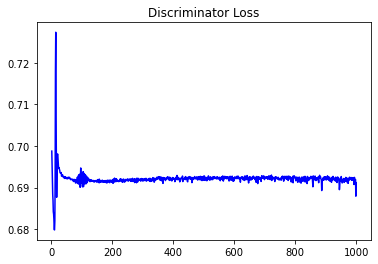

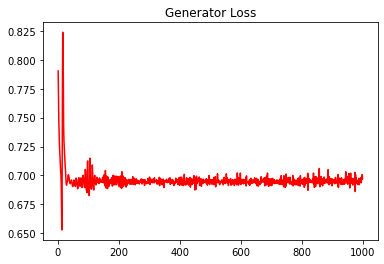

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.36376789194611125


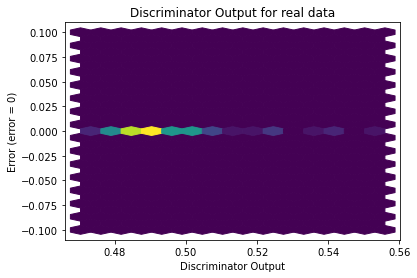

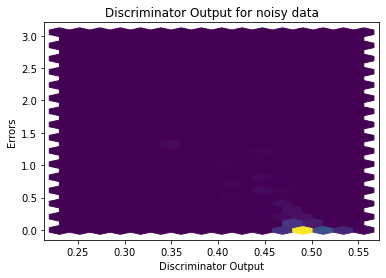

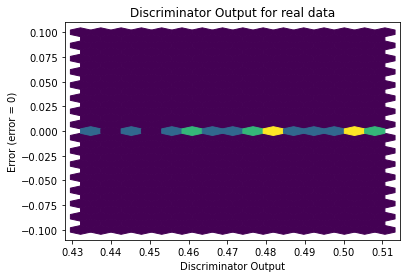

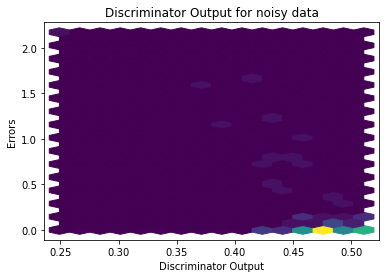

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


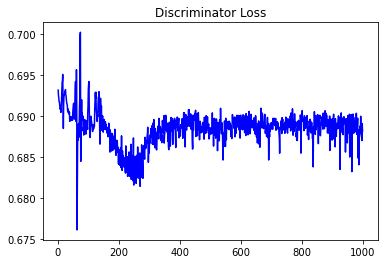

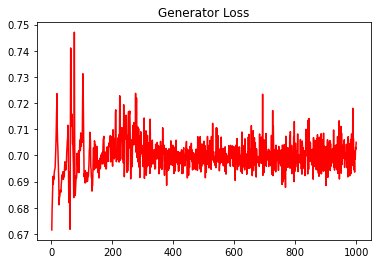

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.2045530524129038


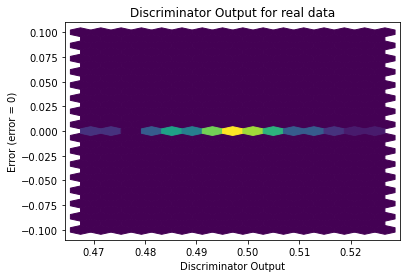

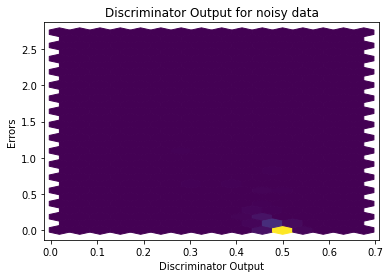

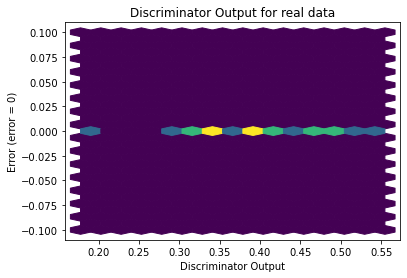

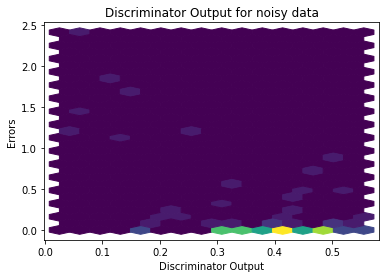

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1688]], requires_grad=True)
